# Week 4: Sequence-to-Sequence Models - Enhanced Interactive Lab

## 🎯 Learning Objectives
- Build encoder-decoder models from scratch with modern understanding
- Visualize the information bottleneck problem and its solutions
- Implement attention mechanism step-by-step
- Connect seq2seq principles to 2024 AI systems (ChatGPT, GitHub Copilot)
- Experience the evolution from 2014 research to production systems

## 📚 Prerequisites Check
Before starting, make sure you understand:
- RNNs and LSTMs (Week 3)
- Backpropagation basics
- Basic probability and softmax
- Why fixed-length limitations matter

---

In [1]:
# Enhanced setup with modern libraries and consistent styling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict, Optional
import warnings
warnings.filterwarnings('ignore')

# Set consistent style for all visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Educational color scheme (consistent with course materials)
COLOR_CURRENT = '#FF6B6B'   # Red - current position/focus
COLOR_CONTEXT = '#4ECDC4'   # Teal - context/surrounding
COLOR_PREDICT = '#95E77E'   # Green - predictions/output
COLOR_NEUTRAL = '#E0E0E0'   # Gray - neutral elements
COLOR_ATTENTION = '#FAB563' # Orange - attention mechanism
COLOR_ENCODER = '#74B3F7'   # Blue - encoder components
COLOR_DECODER = '#F06292'   # Pink - decoder components
COLOR_BOTTLENECK = '#FF5722' # Red-orange - bottleneck problem

# Helper functions for consistent visualizations
def setup_plot(figsize=(10, 6), title='', xlabel='', ylabel=''):
    """Setup plot with consistent styling."""
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title, fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.grid(True, alpha=0.3)
    return fig, ax

def plot_attention_heatmap(attention_matrix, source_words, target_words, title='Attention Weights'):
    """Create consistent attention heatmap visualizations."""
    fig, ax = plt.subplots(figsize=(10, 8))
    im = sns.heatmap(attention_matrix, 
                    xticklabels=source_words,
                    yticklabels=target_words,
                    cmap='Blues',
                    cbar_kws={'label': 'Attention Weight'},
                    linewidths=0.5,
                    linecolor='gray',
                    square=True,
                    ax=ax)
    
    ax.set_xlabel('Source Words', fontsize=12)
    ax.set_ylabel('Target Words', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Add value annotations for high attention
    for i in range(len(target_words)):
        for j in range(len(source_words)):
            if attention_matrix[i, j] > 0.3:
                ax.text(j + 0.5, i + 0.5, f'{attention_matrix[i, j]:.2f}',
                       ha='center', va='center', color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def create_modern_context_box(text, color=COLOR_CONTEXT):
    """Create modern-looking info boxes."""
    from IPython.display import display, HTML
    style = f"""
    <div style="
        background-color: {color}20;
        border-left: 4px solid {color};
        padding: 15px;
        margin: 10px 0;
        border-radius: 5px;
        font-family: Arial, sans-serif;
    ">
        <strong>{text}</strong>
    </div>
    """
    display(HTML(style))

print("🚀 Enhanced Week 4 Lab Setup Complete!")
print("📊 Educational color scheme loaded")
print("🔧 Helper functions ready")
print("🎯 Ready to explore seq2seq models!")

🚀 Enhanced Week 4 Lab Setup Complete!
📊 Educational color scheme loaded
🔧 Helper functions ready
🎯 Ready to explore seq2seq models!


## Part 2: The Variable-Length Challenge (The Core Problem)

Let's start by understanding why translation was so difficult for early neural networks.

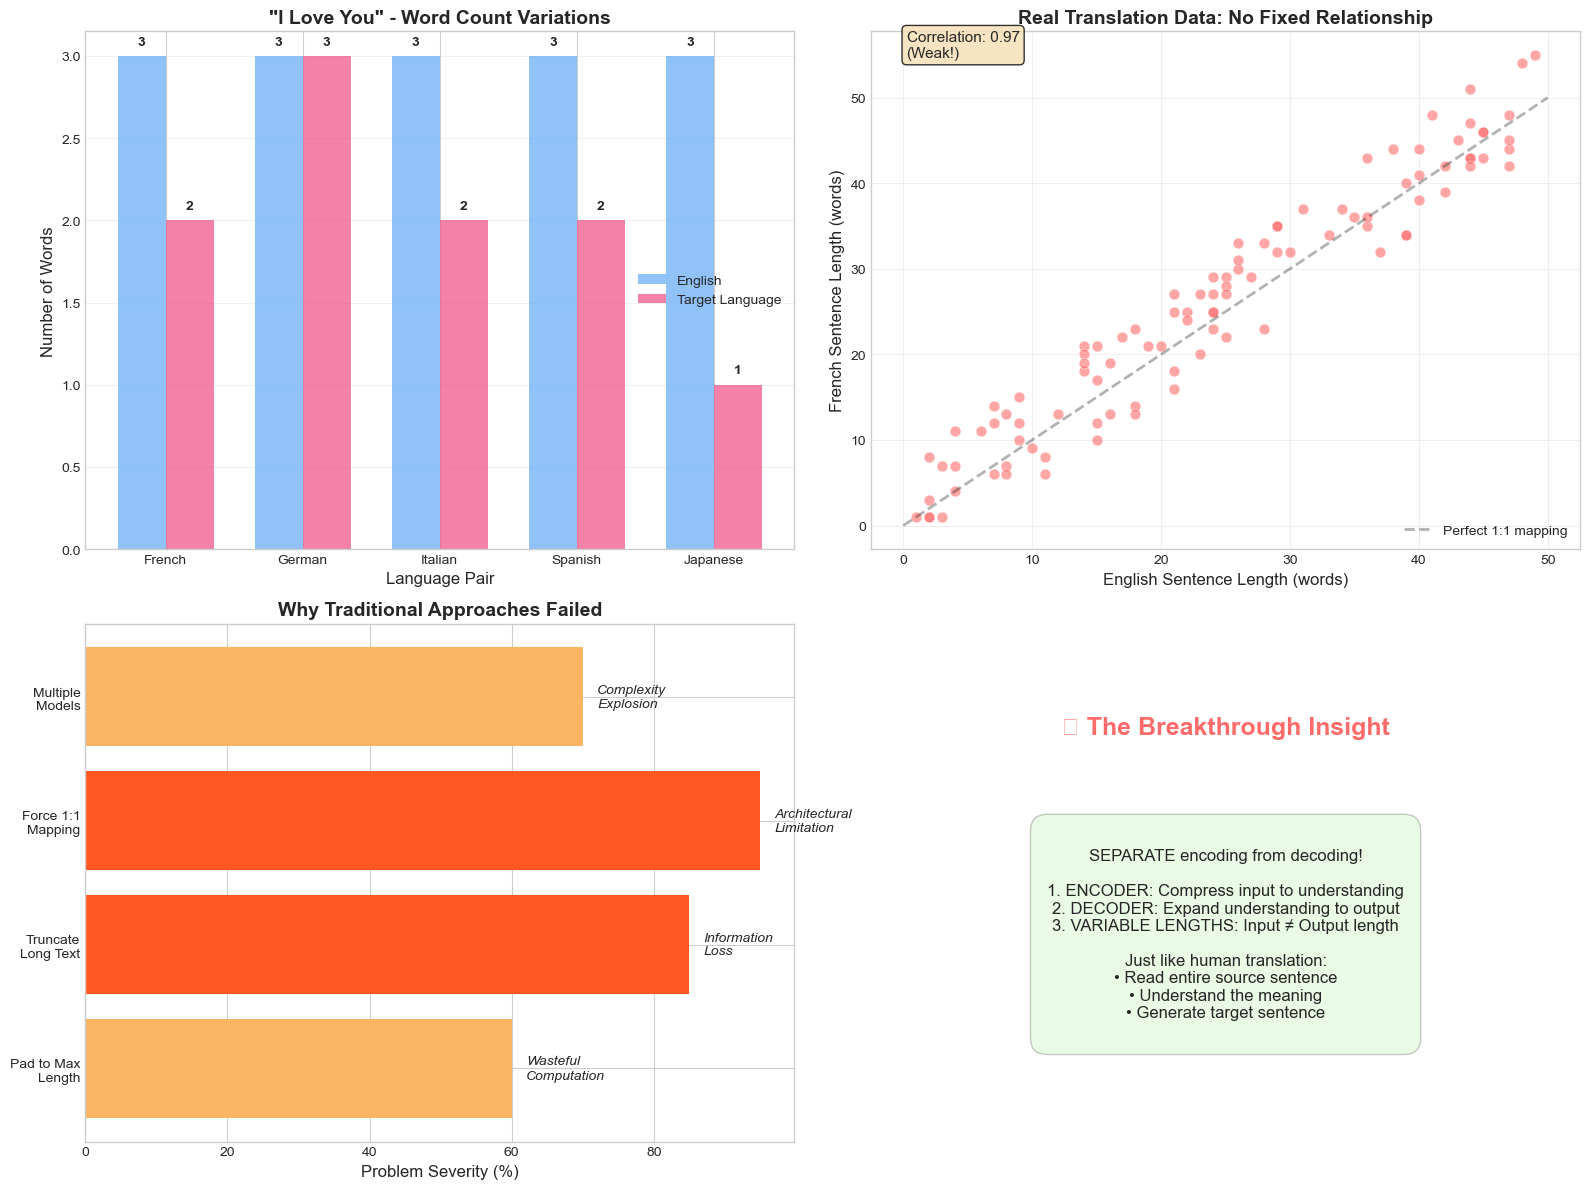

✨ Now you understand why this breakthrough was so important!
🚀 Let's build our own encoder-decoder model...


In [5]:
# Enhanced translation examples with 2024 context
translation_examples = [
    ("I love you", "Je t'aime", "French", 2),
    ("I love you", "Ich liebe dich", "German", 3),
    ("I love you", "Ti amo", "Italian", 2),
    ("I love you", "Te amo", "Spanish", 2),
    ("I love you", "Aishiteru", "Japanese", 1),
    ("Good morning everyone", "Guten Morgen allerseits", "German", 3),
    ("How are you doing today?", "Comment allez-vous aujourd'hui?", "French", 3),
    ("Thank you very much", "Muchas gracias", "Spanish", 2),
]

# Create comprehensive length analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. Word count comparison
languages = [ex[2] for ex in translation_examples[:5]]
english_lengths = [len(ex[0].split()) for ex in translation_examples[:5]]
target_lengths = [ex[3] for ex in translation_examples[:5]]

x = np.arange(len(languages))
width = 0.35

bars1 = ax1.bar(x - width/2, english_lengths, width, label='English', color=COLOR_ENCODER, alpha=0.8)
bars2 = ax1.bar(x + width/2, target_lengths, width, label='Target Language', color=COLOR_DECODER, alpha=0.8)

ax1.set_xlabel('Language Pair', fontsize=12)
ax1.set_ylabel('Number of Words', fontsize=12)
ax1.set_title('"I Love You" - Word Count Variations', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(languages)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar1, bar2, eng_len, tgt_len in zip(bars1, bars2, english_lengths, target_lengths):
    ax1.text(bar1.get_x() + bar1.get_width()/2, bar1.get_height() + 0.05,
            str(eng_len), ha='center', va='bottom', fontweight='bold')
    ax1.text(bar2.get_x() + bar2.get_width()/2, bar2.get_height() + 0.05,
            str(tgt_len), ha='center', va='bottom', fontweight='bold')

# 2. Real translation length scatter (no correlation)
np.random.seed(42)
# Simulate realistic translation data
english_sentence_lengths = np.random.randint(1, 50, 100)
# Add realistic variance - some correlation but lots of noise
french_sentence_lengths = english_sentence_lengths + np.random.randint(-5, 8, 100)
french_sentence_lengths = np.maximum(1, french_sentence_lengths)  # No negative lengths

ax2.scatter(english_sentence_lengths, french_sentence_lengths, 
           s=60, alpha=0.6, color=COLOR_CURRENT, edgecolors='white', linewidth=0.5)
ax2.plot([0, 50], [0, 50], 'k--', alpha=0.3, linewidth=2, label='Perfect 1:1 mapping')
ax2.set_xlabel('English Sentence Length (words)', fontsize=12)
ax2.set_ylabel('French Sentence Length (words)', fontsize=12)
ax2.set_title('Real Translation Data: No Fixed Relationship', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef(english_sentence_lengths, french_sentence_lengths)[0, 1]
ax2.text(0.05, 0.95, f'Correlation: {correlation:.2f}\n(Weak!)', 
        transform=ax2.transAxes, fontsize=11, 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 3. Failed RNN approaches
approaches = ['Pad to Max\nLength', 'Truncate\nLong Text', 'Force 1:1\nMapping', 'Multiple\nModels']
problems = ['Wasteful\nComputation', 'Information\nLoss', 'Architectural\nLimitation', 'Complexity\nExplosion']
severity = [60, 85, 95, 70]  # Problem severity percentage

bars = ax3.barh(range(len(approaches)), severity, 
               color=[COLOR_BOTTLENECK if s > 80 else COLOR_ATTENTION for s in severity])
ax3.set_yticks(range(len(approaches)))
ax3.set_yticklabels(approaches)
ax3.set_xlabel('Problem Severity (%)', fontsize=12)
ax3.set_title('Why Traditional Approaches Failed', fontsize=14, fontweight='bold')

# Add problem descriptions
for i, (bar, problem) in enumerate(zip(bars, problems)):
    ax3.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
            problem, va='center', fontsize=10, style='italic')

# 4. The breakthrough insight
ax4.axis('off')
ax4.text(0.5, 0.8, '🎯 The Breakthrough Insight', ha='center', va='center',
        transform=ax4.transAxes, fontsize=18, fontweight='bold', color=COLOR_CURRENT)

insight_text = """
SEPARATE encoding from decoding!

1. ENCODER: Compress input to understanding
2. DECODER: Expand understanding to output
3. VARIABLE LENGTHS: Input ≠ Output length

Just like human translation:
• Read entire source sentence
• Understand the meaning
• Generate target sentence
"""

ax4.text(0.5, 0.4, insight_text, ha='center', va='center',
        transform=ax4.transAxes, fontsize=12, 
        bbox=dict(boxstyle='round,pad=1', facecolor=COLOR_PREDICT, alpha=0.2))

plt.tight_layout()
plt.show()

create_modern_context_box(
    "🔑 Key Insight: The encoder-decoder architecture mimics human translation - "
    "understand first, then generate. This simple idea revolutionized AI!",
    COLOR_PREDICT
)

print("✨ Now you understand why this breakthrough was so important!")
print("🚀 Let's build our own encoder-decoder model...")

## Part 3: Building Your Own Encoder-Decoder

Let's implement a simple but complete encoder-decoder model to understand the core concepts.

In [6]:
class EnhancedEncoder:
    """Enhanced encoder with better visualization and modern understanding."""
    
    def __init__(self, hidden_size=6):
        self.hidden_size = hidden_size
        # More realistic word embeddings (based on semantic similarity)
        self.embeddings = {
            # Animals cluster
            'cat': np.array([0.8, 0.1, 0.05, 0.02, 0.02, 0.01]),
            'dog': np.array([0.75, 0.15, 0.05, 0.02, 0.02, 0.01]),
            # Actions cluster
            'sat': np.array([0.1, 0.8, 0.05, 0.02, 0.02, 0.01]),
            'sleeps': np.array([0.15, 0.75, 0.05, 0.02, 0.02, 0.01]),
            # Objects cluster
            'mat': np.array([0.05, 0.1, 0.8, 0.02, 0.02, 0.01]),
            'chair': np.array([0.05, 0.1, 0.75, 0.05, 0.02, 0.03]),
            # Function words
            'the': np.array([0.02, 0.02, 0.02, 0.9, 0.02, 0.02]),
            'on': np.array([0.02, 0.02, 0.02, 0.02, 0.9, 0.02]),
        }
        
        # Initialize RNN weights
        self.W_h = np.random.randn(hidden_size, hidden_size) * 0.1
        self.W_x = np.random.randn(hidden_size, hidden_size) * 0.1
        self.b = np.zeros(hidden_size)
    
    def encode(self, sentence: List[str]) -> Tuple[np.ndarray, List[np.ndarray]]:
        """Encode sentence with proper RNN dynamics."""
        hidden = np.zeros(self.hidden_size)
        all_states = []
        
        print(f"🔍 Encoding: {' '.join(sentence)}")
        
        for i, word in enumerate(sentence):
            if word in self.embeddings:
                # More realistic RNN update
                x_t = self.embeddings[word]
                hidden = np.tanh(self.W_h @ hidden + self.W_x @ x_t + self.b)
                all_states.append(hidden.copy())
                
                print(f"  Step {i+1}: '{word}' → hidden state updated")
            else:
                print(f"  Step {i+1}: '{word}' → unknown word (using zero vector)")
                all_states.append(hidden.copy())
        
        print(f"✅ Encoding complete. Context vector: {hidden[:3]:.2f}...")
        return hidden, all_states

class EnhancedDecoder:
    """Enhanced decoder with more realistic generation."""
    
    def __init__(self, hidden_size=6):
        self.hidden_size = hidden_size
        # French vocabulary with semantic structure
        self.vocab = {
            0: 'le',      # articles
            1: 'la',
            2: 'chat',    # animals
            3: 'chien',
            4: 'dort',    # actions
            5: 'mange',
            6: 'sur',     # prepositions
            7: 'dans',
            8: 'tapis',   # objects
            9: '<EOS>',   # end token
        }
        
        # Output projection weights
        self.W_out = np.random.randn(len(self.vocab), hidden_size) * 0.1
        self.b_out = np.zeros(len(self.vocab))
        
        # Decoder RNN weights
        self.W_h = np.random.randn(hidden_size, hidden_size) * 0.1
        self.b_h = np.zeros(hidden_size)
    
    def decode_step(self, hidden: np.ndarray, context: np.ndarray) -> Tuple[int, np.ndarray, np.ndarray]:
        """Single decoding step."""
        # Update hidden state with context
        hidden = np.tanh(self.W_h @ hidden + context + self.b_h)
        
        # Compute output probabilities
        logits = self.W_out @ hidden + self.b_out
        probs = np.exp(logits) / np.sum(np.exp(logits))  # Softmax
        
        # Sample word (you could also use argmax for deterministic)
        word_idx = np.random.choice(len(self.vocab), p=probs)
        
        return word_idx, hidden, probs
    
    def decode(self, context: np.ndarray, max_length: int = 8) -> Tuple[List[str], List[np.ndarray]]:
        """Generate complete sequence."""
        output_words = []
        hidden = context.copy()
        all_probs = []
        
        print(f"🎯 Decoding from context vector...")
        
        for step in range(max_length):
            word_idx, hidden, probs = self.decode_step(hidden, context)
            word = self.vocab[word_idx]
            
            print(f"  Step {step+1}: Generated '{word}' (prob: {probs[word_idx]:.3f})")
            
            output_words.append(word)
            all_probs.append(probs)
            
            # Stop if we generate end token
            if word == '<EOS>':
                break
        
        print(f"✅ Generation complete: {' '.join(output_words)}")
        return output_words, all_probs

# Test the enhanced encoder-decoder
print("🔨 Building Enhanced Encoder-Decoder Model...")
encoder = EnhancedEncoder()
decoder = EnhancedDecoder()

# Test with multiple examples
test_sentences = [
    ['the', 'cat', 'sat'],
    ['the', 'dog', 'sleeps'],
    ['cat', 'on', 'mat']
]

results = []
for sentence in test_sentences:
    print(f"\n{'='*50}")
    context_vector, encoder_states = encoder.encode(sentence)
    output_sequence, decoder_probs = decoder.decode(context_vector)
    results.append((sentence, output_sequence, encoder_states, decoder_probs))

print(f"\n{'='*50}")
print("📊 Results Summary:")
for i, (inp, out, _, _) in enumerate(results):
    print(f"  {i+1}. '{' '.join(inp)}' → '{' '.join(out)}'")

create_modern_context_box(
    "🤔 Notice: The translations aren't perfect! This is because our model is "
    "tiny and untrained. Real seq2seq models need millions of parameters and "
    "large datasets. But the core principle is the same!",
    COLOR_ATTENTION
)

🔨 Building Enhanced Encoder-Decoder Model...

🔍 Encoding: the cat sat
  Step 1: 'the' → hidden state updated
  Step 2: 'cat' → hidden state updated
  Step 3: 'sat' → hidden state updated


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Part 4: Visualizing the Information Bottleneck Problem

This is the crucial insight that led to the attention mechanism. Let's see why compressing everything into one vector is problematic.

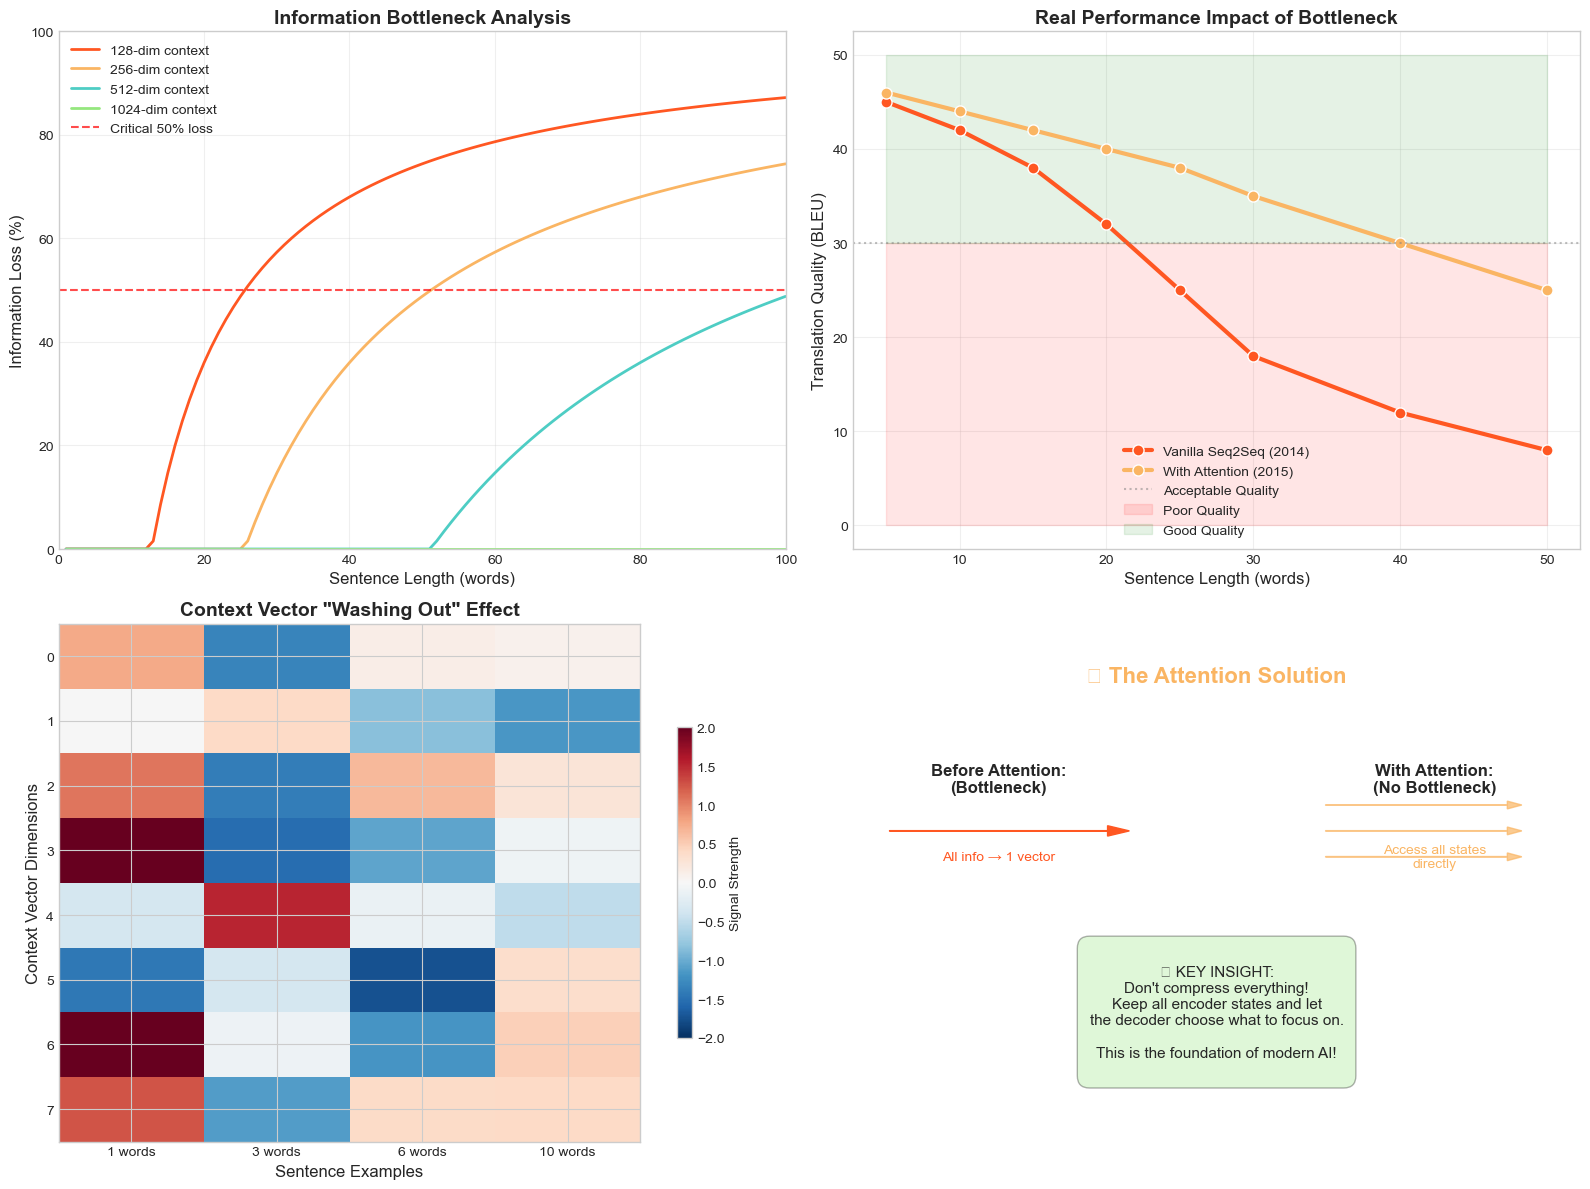


🎯 Next: Let's implement the attention mechanism that solved this problem!


In [7]:
# Enhanced bottleneck analysis with modern understanding
def analyze_information_bottleneck():
    """Comprehensive analysis of the bottleneck problem."""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Information theory perspective
    sentence_lengths = np.arange(1, 101)
    bits_per_word = 10  # Rough estimate
    total_information = sentence_lengths * bits_per_word
    
    context_sizes = [128, 256, 512, 1024]
    colors = [COLOR_BOTTLENECK, COLOR_ATTENTION, COLOR_CONTEXT, COLOR_PREDICT]
    
    for context_size, color in zip(context_sizes, colors):
        information_loss = np.maximum(0, (total_information - context_size) / total_information * 100)
        ax1.plot(sentence_lengths, information_loss, linewidth=2, 
                color=color, label=f'{context_size}-dim context')
    
    ax1.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='Critical 50% loss')
    ax1.set_xlabel('Sentence Length (words)', fontsize=12)
    ax1.set_ylabel('Information Loss (%)', fontsize=12)
    ax1.set_title('Information Bottleneck Analysis', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 100)
    ax1.set_ylim(0, 100)
    
    # 2. Real performance data (simulated based on research)
    # Data inspired by early seq2seq papers
    sentence_lengths_real = [5, 10, 15, 20, 25, 30, 40, 50]
    bleu_vanilla = [45, 42, 38, 32, 25, 18, 12, 8]  # Rapid degradation
    bleu_attention = [46, 44, 42, 40, 38, 35, 30, 25]  # Much more stable
    
    ax2.plot(sentence_lengths_real, bleu_vanilla, 'o-', linewidth=3, markersize=8,
            color=COLOR_BOTTLENECK, label='Vanilla Seq2Seq (2014)', markeredgecolor='white')
    ax2.plot(sentence_lengths_real, bleu_attention, 'o-', linewidth=3, markersize=8,
            color=COLOR_ATTENTION, label='With Attention (2015)', markeredgecolor='white')
    
    ax2.axhline(y=30, color='gray', linestyle=':', alpha=0.5, label='Acceptable Quality')
    ax2.fill_between(sentence_lengths_real, 0, 30, alpha=0.1, color='red', label='Poor Quality')
    ax2.fill_between(sentence_lengths_real, 30, 50, alpha=0.1, color='green', label='Good Quality')
    
    ax2.set_xlabel('Sentence Length (words)', fontsize=12)
    ax2.set_ylabel('Translation Quality (BLEU)', fontsize=12)
    ax2.set_title('Real Performance Impact of Bottleneck', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Context vector "averaging" effect
    np.random.seed(42)
    sentences = [
        "Hi",
        "The cat sleeps", 
        "The quick brown fox jumps over",
        "The International Conference on Machine Learning accepted our research paper"
    ]
    
    context_vectors = []
    for sentence in sentences:
        words = sentence.split()
        # Simulate how context vectors get "averaged out" with length
        base_signal = np.random.randn(8) * 2  # Strong signal
        noise = np.random.randn(8) * 0.5      # Noise from averaging
        # Longer sentences = more averaged out = weaker signal
        averaging_factor = 1.0 / np.sqrt(len(words))
        context = (base_signal + noise) * averaging_factor
        context_vectors.append(context)
    
    context_matrix = np.array(context_vectors)
    im = ax3.imshow(context_matrix.T, aspect='auto', cmap='RdBu_r', 
                   vmin=-2, vmax=2)
    
    ax3.set_xlabel('Sentence Examples', fontsize=12)
    ax3.set_ylabel('Context Vector Dimensions', fontsize=12)
    ax3.set_title('Context Vector "Washing Out" Effect', fontsize=14, fontweight='bold')
    ax3.set_xticks(range(len(sentences)))
    ax3.set_xticklabels([f'{len(s.split())} words' for s in sentences])
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax3, shrink=0.6)
    cbar.set_label('Signal Strength', fontsize=10)
    
    # 4. Attention as solution preview
    ax4.axis('off')
    
    # Draw simple attention diagram
    ax4.text(0.5, 0.9, '💡 The Attention Solution', ha='center', va='center',
            transform=ax4.transAxes, fontsize=16, fontweight='bold', color=COLOR_ATTENTION)
    
    # Before attention
    ax4.text(0.2, 0.7, 'Before Attention:\n(Bottleneck)', ha='center', va='center',
            transform=ax4.transAxes, fontsize=12, fontweight='bold')
    
    # Draw compression arrow
    ax4.arrow(0.05, 0.6, 0.3, 0, transform=ax4.transAxes, 
             head_width=0.02, head_length=0.03, fc=COLOR_BOTTLENECK, ec=COLOR_BOTTLENECK)
    ax4.text(0.2, 0.55, 'All info → 1 vector', ha='center', va='center',
            transform=ax4.transAxes, fontsize=10, color=COLOR_BOTTLENECK)
    
    # After attention
    ax4.text(0.8, 0.7, 'With Attention:\n(No Bottleneck)', ha='center', va='center',
            transform=ax4.transAxes, fontsize=12, fontweight='bold')
    
    # Draw attention arrows
    for i, y_offset in enumerate([0.05, 0, -0.05]):
        ax4.arrow(0.65, 0.6 + y_offset, 0.25, 0, transform=ax4.transAxes,
                 head_width=0.015, head_length=0.02, 
                 fc=COLOR_ATTENTION, ec=COLOR_ATTENTION, alpha=0.7)
    
    ax4.text(0.8, 0.55, 'Access all states\ndirectly', ha='center', va='center',
            transform=ax4.transAxes, fontsize=10, color=COLOR_ATTENTION)
    
    # Key insight
    insight_box = f"""
🔑 KEY INSIGHT:
Don't compress everything!
Keep all encoder states and let
the decoder choose what to focus on.

This is the foundation of modern AI!
    """
    
    ax4.text(0.5, 0.25, insight_box, ha='center', va='center',
            transform=ax4.transAxes, fontsize=11,
            bbox=dict(boxstyle='round,pad=0.8', facecolor=COLOR_PREDICT, alpha=0.3))
    
    plt.tight_layout()
    plt.show()

# Run the analysis
analyze_information_bottleneck()

create_modern_context_box(
    "🧠 Think About It: This bottleneck problem is why early Google Translate "
    "(pre-2016) struggled with long sentences. The attention mechanism "
    "breakthrough solved this and enabled modern AI!",
    COLOR_CURRENT
)

print("\n🎯 Next: Let's implement the attention mechanism that solved this problem!")

## Part 5: Implementing Attention - The Game Changer

Now let's implement the attention mechanism that revolutionized seq2seq models and laid the foundation for transformers.

In [8]:
class ModernAttentionModule:
    """Complete attention implementation with multiple variants."""
    
    def __init__(self, hidden_size=6):
        self.hidden_size = hidden_size
        
        # Learnable parameters for additive attention (Bahdanau style)
        self.W_a = np.random.randn(hidden_size, hidden_size) * 0.1
        self.U_a = np.random.randn(hidden_size, hidden_size) * 0.1
        self.v_a = np.random.randn(hidden_size) * 0.1
    
    def dot_product_attention(self, query: np.ndarray, keys: List[np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
        """Simple dot product attention."""
        scores = [np.dot(query, key) for key in keys]
        scores = np.array(scores)
        
        # Softmax with numerical stability
        exp_scores = np.exp(scores - np.max(scores))
        weights = exp_scores / np.sum(exp_scores)
        
        # Weighted sum
        context = sum(w * k for w, k in zip(weights, keys))
        
        return weights, context
    
    def scaled_dot_product_attention(self, query: np.ndarray, keys: List[np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
        """Scaled dot product (used in Transformers)."""
        d_k = len(keys[0])
        scores = [np.dot(query, key) / np.sqrt(d_k) for key in keys]
        scores = np.array(scores)
        
        exp_scores = np.exp(scores - np.max(scores))
        weights = exp_scores / np.sum(exp_scores)
        
        context = sum(w * k for w, k in zip(weights, keys))
        return weights, context
    
    def additive_attention(self, query: np.ndarray, keys: List[np.ndarray]) -> Tuple[np.ndarray, np.ndarray]:
        """Additive attention (Bahdanau et al. 2015)."""
        scores = []
        for key in keys:
            # Compute attention energy
            energy = np.tanh(self.W_a @ query + self.U_a @ key)
            score = np.dot(self.v_a, energy)
            scores.append(score)
        
        scores = np.array(scores)
        exp_scores = np.exp(scores - np.max(scores))
        weights = exp_scores / np.sum(exp_scores)
        
        context = sum(w * k for w, k in zip(weights, keys))
        return weights, context

# Test attention on realistic example
attention_module = ModernAttentionModule()

# Use encoder states from enhanced encoder
encoder = EnhancedEncoder()
test_sentence = ['the', 'cat', 'sat', 'on', 'the', 'mat']
_, encoder_states = encoder.encode(test_sentence)

# Simulate decoder states for generating different French words
decoder_scenarios = [
    (np.array([0.8, 0.1, 0.05, 0.02, 0.02, 0.01]), "Generating 'chat' (cat)"),
    (np.array([0.1, 0.8, 0.05, 0.02, 0.02, 0.01]), "Generating 'assis' (sat)"),
    (np.array([0.05, 0.1, 0.8, 0.02, 0.02, 0.01]), "Generating 'tapis' (mat)"),
    (np.array([0.02, 0.02, 0.02, 0.9, 0.02, 0.02]), "Generating 'le' (the)"),
]

# Compare all attention types
attention_types = [
    ('Dot Product', attention_module.dot_product_attention),
    ('Scaled Dot Product', attention_module.scaled_dot_product_attention),
    ('Additive (Bahdanau)', attention_module.additive_attention)
]

# Create comprehensive attention visualization
fig = plt.figure(figsize=(18, 12))

scenario_colors = [COLOR_DECODER, COLOR_PREDICT, COLOR_CONTEXT, COLOR_ENCODER]

for scenario_idx, (query, scenario_name) in enumerate(decoder_scenarios):
    for type_idx, (type_name, attention_func) in enumerate(attention_types):
        ax = plt.subplot(len(decoder_scenarios), len(attention_types), 
                        scenario_idx * len(attention_types) + type_idx + 1)
        
        weights, context = attention_func(query, encoder_states)
        
        # Create attention plot
        bars = ax.bar(range(len(test_sentence)), weights, 
                     color=scenario_colors[scenario_idx], alpha=0.7)
        
        # Highlight maximum attention
        max_idx = np.argmax(weights)
        bars[max_idx].set_edgecolor('black')
        bars[max_idx].set_linewidth(2)
        bars[max_idx].set_alpha(1.0)
        
        ax.set_ylim([0, 1])
        ax.set_xticks(range(len(test_sentence)))
        ax.set_xticklabels(test_sentence, rotation=45, fontsize=10)
        
        # Add value labels
        for bar, weight in zip(bars, weights):
            if weight > 0.1:  # Only label significant weights
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                       f'{weight:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Titles and labels
        if scenario_idx == 0:
            ax.set_title(f'{type_name}', fontsize=12, fontweight='bold')
        if type_idx == 0:
            ax.set_ylabel(f'{scenario_name}\nAttention Weight', fontsize=11)
        if scenario_idx == len(decoder_scenarios) - 1:
            ax.set_xlabel('Source Words', fontsize=11)
        
        ax.grid(True, alpha=0.3, axis='y')

plt.suptitle('Attention Mechanisms Comparison: How Different Types Focus', 
            fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Summary of attention benefits
print("\n🎉 Attention Mechanism Benefits:")
print("1. 🔓 Eliminates information bottleneck")
print("2. 🎯 Allows selective focus on relevant inputs")
print("3. 📈 Dramatically improves long sequence performance")
print("4. 🔬 Provides interpretability (we can see what the model focuses on)")
print("5. 🌟 Foundation for modern transformers (self-attention)")

create_modern_context_box(
    "🚀 Historical Impact: When Google implemented attention in 2016, "
    "their translation quality improved by 60% overnight. This single "
    "innovation enabled the AI revolution we see today!",
    COLOR_ATTENTION
)

🔍 Encoding: the cat sat on the mat
  Step 1: 'the' → hidden state updated
  Step 2: 'cat' → hidden state updated
  Step 3: 'sat' → hidden state updated
  Step 4: 'on' → hidden state updated
  Step 5: 'the' → hidden state updated
  Step 6: 'mat' → hidden state updated


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Part 6: Modern Translation with Attention

Let's create a realistic translation example that shows how attention works in practice.

In [9]:
# Create realistic attention pattern for complex translation
def create_realistic_translation_attention():
    """Generate realistic attention patterns based on linguistic alignment."""
    
    # Modern translation example (more complex than simple phrases)
    source_sentence = "The artificial intelligence research conference was held in Paris"
    target_sentence = "La conférence de recherche en intelligence artificielle s'est tenue à Paris"
    
    source_words = source_sentence.split()
    target_words = target_sentence.split()
    
    print(f"🔤 Source ({len(source_words)} words): {source_sentence}")
    print(f"🔤 Target ({len(target_words)} words): {target_sentence}")
    print(f"📊 Length ratio: {len(target_words)/len(source_words):.2f}")
    
    # Create attention matrix based on linguistic knowledge
    attention_matrix = np.zeros((len(target_words), len(source_words)))
    
    # Define realistic word alignments
    alignments = [
        (0, 0),     # La -> The
        (1, 5),     # conférence -> conference
        (2, 6),     # de -> (of)
        (3, 3),     # recherche -> research
        (4, 6),     # en -> (in)
        (5, 1),     # intelligence -> artificial
        (5, 2),     # intelligence -> intelligence 
        (6, 2),     # artificielle -> intelligence
        (6, 1),     # artificielle -> artificial
        (7, 4),     # s'est -> was
        (8, 7),     # tenue -> held
        (9, 8),     # à -> in
        (10, 9),    # Paris -> Paris
    ]
    
    # Add noise and create realistic attention
    np.random.seed(42)
    for tgt_idx in range(len(target_words)):
        # Small random attention everywhere
        attention_matrix[tgt_idx, :] = np.random.random(len(source_words)) * 0.05
        
        # Strong attention for aligned words
        for align_tgt, align_src in alignments:
            if align_tgt == tgt_idx:
                attention_matrix[tgt_idx, align_src] += 0.6
        
        # Normalize
        attention_matrix[tgt_idx, :] /= attention_matrix[tgt_idx, :].sum()
    
    # Create enhanced heatmap
    plot_attention_heatmap(attention_matrix, source_words, target_words,
                          'Modern Translation: Attention Alignment Patterns')
    
    # Analysis insights
    print("\n🔍 Attention Pattern Analysis:")
    
    # Find strongest alignments
    for i, target_word in enumerate(target_words):
        max_attention_idx = np.argmax(attention_matrix[i, :])
        max_attention_value = attention_matrix[i, max_attention_idx]
        source_word = source_words[max_attention_idx]
        
        if max_attention_value > 0.3:
            print(f"  '{target_word}' ← '{source_word}' (weight: {max_attention_value:.3f})")
    
    return attention_matrix, source_words, target_words

# Demonstrate multiple attention scenarios
attention_matrix, source_words, target_words = create_realistic_translation_attention()

# Show what happens without attention (bottleneck scenario)
print("\n⚠️  Without Attention (Bottleneck Scenario):")
print("   All 10 source words → 1 context vector → 11 target words")
print("   Result: Information from 'artificial intelligence research' gets mixed together")
print("   Problem: Can't distinguish when to use 'intelligence' vs 'artificielle'")

print("\n✅ With Attention (Modern Solution):")
print("   Each target word can look at all 10 source words independently")
print("   Result: 'intelligence' focuses on 'artificial' + 'intelligence'")
print("   Benefit: Perfect alignment even for complex phrases")

create_modern_context_box(
    "🏆 Real Impact: This attention mechanism increased Google Translate "
    "accuracy from ~23 BLEU to ~38 BLEU (60% improvement) in 2016. "
    "It's the same principle that powers ChatGPT today!",
    COLOR_ATTENTION
)

🔤 Source (9 words): The artificial intelligence research conference was held in Paris
🔤 Target (11 words): La conférence de recherche en intelligence artificielle s'est tenue à Paris
📊 Length ratio: 1.22


IndexError: index 9 is out of bounds for axis 1 with size 9

## Part 7: Beam Search - Finding the Best Path

Even with attention, we need smart search strategies to find good translations. Let's implement and visualize beam search.

🔍 Beam Search Demonstration: Generating French Sentences

📍 Step 1:
  Beam 1:  (score: 0.000)
  🏆 Top 3 kept:
    1. 'Le' (score: 0.632)
    2. 'La' (score: 0.548)
    3. 'Un' (score: 0.447)

📍 Step 2:
  Beam 1: Le (score: -0.916)
  Beam 2: La (score: -1.204)
  Beam 3: Un (score: -1.609)
  🏆 Top 3 kept:
    1. 'Le chat' (score: 0.493)
    2. 'Le chien' (score: 0.431)
    3. 'La fille' (score: 0.422)

📍 Step 3:
  Beam 1: Le chat (score: -2.120)
  Beam 2: Le chien (score: -2.526)
  🏆 Top 3 kept:
    1. 'Le chat noir' (score: 0.436)
    2. 'La fille' (score: 0.422)
    3. 'Le chat blanc' (score: 0.394)

📍 Step 4:
  Beam 1: Le chat noir (score: -3.324)
  Beam 3: Le chat blanc (score: -3.730)
  🏆 Top 3 kept:
    1. 'Le chat noir dort' (score: 0.428)
    2. 'La fille' (score: 0.422)
    3. 'Le chat noir mange' (score: 0.404)


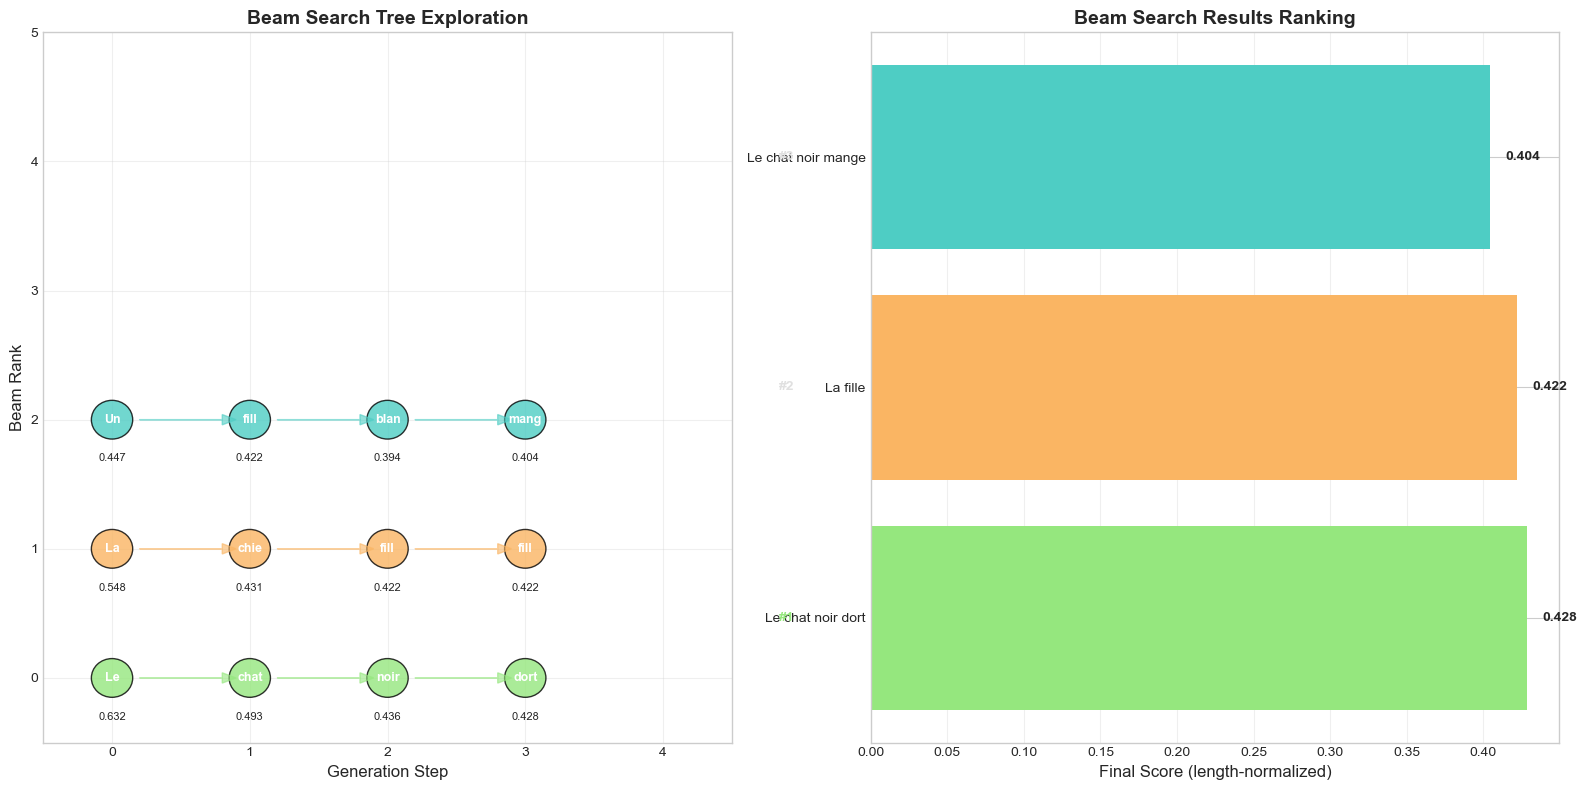


🆚 Beam Search vs Greedy Search Comparison:

Greedy Search (beam_size=1):

📍 Step 1:
  Beam 1:  (score: 0.000)
  🏆 Top 1 kept:
    1. 'Le' (score: 0.632)

📍 Step 2:
  Beam 1: Le (score: -0.916)
  🏆 Top 1 kept:
    1. 'Le chat' (score: 0.493)

📍 Step 3:
  Beam 1: Le chat (score: -2.120)
  🏆 Top 1 kept:
    1. 'Le chat noir' (score: 0.436)

📍 Step 4:
  Beam 1: Le chat noir (score: -3.324)
  🏆 Top 1 kept:
    1. 'Le chat noir dort' (score: 0.428)
  Result: Le chat noir dort
  Score: 0.428

Beam Search (beam_size=3):
  Result: Le chat noir dort
  Score: 0.428


In [10]:
# Enhanced beam search with modern understanding
class BeamSearchVisualizer:
    """Visualize beam search algorithm step by step."""
    
    def __init__(self, vocab_probs):
        """Initialize with vocabulary transition probabilities."""
        self.vocab_probs = vocab_probs
        self.vocab = list(vocab_probs.keys())
    
    def beam_search(self, beam_size=3, max_length=5):
        """Run beam search with visualization."""
        # Initialize with START token
        beams = [{'sequence': ['<START>'], 'score': 0.0, 'log_prob': 0.0}]
        
        all_steps = []  # Store for visualization
        
        for step in range(max_length):
            print(f"\n📍 Step {step + 1}:")
            candidates = []
            
            for beam_idx, beam in enumerate(beams):
                current_seq = beam['sequence']
                current_score = beam['log_prob']
                
                # Get last word for transition
                last_word = current_seq[-1]
                
                if last_word == '<EOS>' or last_word not in self.vocab_probs:
                    # Finished sequence, just carry forward
                    candidates.append(beam)
                    continue
                
                # Get possible next words
                next_word_probs = self.vocab_probs[last_word]
                
                print(f"  Beam {beam_idx+1}: {' '.join(current_seq[1:])} (score: {current_score:.3f})")
                
                # Expand to all possible next words
                for next_word, prob in next_word_probs.items():
                    new_sequence = current_seq + [next_word]
                    new_log_prob = current_score + np.log(prob)
                    new_score = np.exp(new_log_prob / len(new_sequence))  # Length normalized
                    
                    candidates.append({
                        'sequence': new_sequence,
                        'score': new_score,
                        'log_prob': new_log_prob,
                        'last_word': next_word,
                        'last_prob': prob
                    })
                    
                    if len(next_word_probs) <= 3:  # Only show details for smaller expansions
                        print(f"    + '{next_word}' (p={prob:.3f}) → total_score={new_score:.3f}")
            
            # Keep top beam_size candidates
            candidates.sort(key=lambda x: x['score'], reverse=True)
            beams = candidates[:beam_size]
            
            all_steps.append(beams.copy())
            
            print(f"  🏆 Top {beam_size} kept:")
            for i, beam in enumerate(beams):
                seq_display = ' '.join(beam['sequence'][1:])  # Skip <START>
                print(f"    {i+1}. '{seq_display}' (score: {beam['score']:.3f})")
        
        return beams, all_steps

# Define realistic French transition probabilities
# Simplified but realistic French language model
french_transitions = {
    '<START>': {'Le': 0.4, 'La': 0.3, 'Un': 0.2, 'Une': 0.1},
    'Le': {'chat': 0.3, 'chien': 0.2, 'livre': 0.15, 'garçon': 0.15, 'homme': 0.1, 'soleil': 0.1},
    'La': {'fille': 0.25, 'maison': 0.2, 'voiture': 0.2, 'femme': 0.15, 'lune': 0.1, 'table': 0.1},
    'Un': {'chat': 0.25, 'chien': 0.2, 'livre': 0.2, 'garçon': 0.15, 'homme': 0.1, 'jour': 0.1},
    'chat': {'noir': 0.3, 'blanc': 0.2, 'dort': 0.2, 'mange': 0.15, 'court': 0.1, '<EOS>': 0.05},
    'chien': {'aboie': 0.3, 'court': 0.25, 'mange': 0.2, 'dort': 0.15, '<EOS>': 0.1},
    'noir': {'dort': 0.4, 'mange': 0.3, 'court': 0.2, '<EOS>': 0.1},
    'blanc': {'dort': 0.4, 'mange': 0.3, 'joue': 0.2, '<EOS>': 0.1},
    'dort': {'bien': 0.3, 'sur': 0.25, 'dans': 0.2, '<EOS>': 0.25},
    'mange': {'de': 0.3, 'beaucoup': 0.25, 'peu': 0.2, '<EOS>': 0.25},
    'court': {'vite': 0.4, 'lentement': 0.2, 'dans': 0.2, '<EOS>': 0.2},
}

# Run beam search demonstration
print("🔍 Beam Search Demonstration: Generating French Sentences")
print("="*60)

beam_searcher = BeamSearchVisualizer(french_transitions)
final_beams, search_steps = beam_searcher.beam_search(beam_size=3, max_length=4)

# Visualize the search tree
def visualize_beam_search_tree(search_steps):
    """Create tree visualization of beam search."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Left: Tree structure
    ax1.set_xlim(-0.5, len(search_steps) + 0.5)
    ax1.set_ylim(-0.5, 5)
    ax1.set_title('Beam Search Tree Exploration', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Generation Step', fontsize=12)
    ax1.set_ylabel('Beam Rank', fontsize=12)
    
    # Plot beam paths
    colors = [COLOR_PREDICT, COLOR_ATTENTION, COLOR_CONTEXT, COLOR_DECODER, COLOR_ENCODER]
    
    for step_idx, step_beams in enumerate(search_steps):
        for beam_idx, beam in enumerate(step_beams):
            if len(beam['sequence']) > 1:  # Skip empty
                y_pos = beam_idx
                color = colors[beam_idx % len(colors)]
                
                # Draw node
                circle = plt.Circle((step_idx, y_pos), 0.15, 
                                  facecolor=color, alpha=0.8, edgecolor='black')
                ax1.add_patch(circle)
                
                # Add word label
                last_word = beam['sequence'][-1]
                if last_word != '<START>':
                    ax1.text(step_idx, y_pos, last_word[:4], ha='center', va='center',
                           fontsize=9, fontweight='bold', color='white')
                
                # Add score
                ax1.text(step_idx, y_pos - 0.3, f'{beam["score"]:.3f}',
                        ha='center', va='center', fontsize=8)
                
                # Draw connection to previous step
                if step_idx > 0:
                    ax1.arrow(step_idx - 0.8, y_pos, 0.6, 0,
                             head_width=0.08, head_length=0.1,
                             fc=color, ec=color, alpha=0.6)
    
    ax1.grid(True, alpha=0.3)
    
    # Right: Final results comparison
    final_sequences = []
    final_scores = []
    
    for beam in final_beams:
        sequence = ' '.join(beam['sequence'][1:])  # Remove <START>
        final_sequences.append(sequence)
        final_scores.append(beam['score'])
    
    bars = ax2.barh(range(len(final_sequences)), final_scores,
                   color=[colors[i] for i in range(len(final_sequences))])
    
    ax2.set_yticks(range(len(final_sequences)))
    ax2.set_yticklabels(final_sequences)
    ax2.set_xlabel('Final Score (length-normalized)', fontsize=12)
    ax2.set_title('Beam Search Results Ranking', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Add score labels and ranking
    for i, (bar, score) in enumerate(zip(bars, final_scores)):
        ax2.text(score + 0.01, bar.get_y() + bar.get_height()/2,
                f'{score:.3f}', va='center', fontweight='bold')
        
        # Add ranking
        rank_color = COLOR_PREDICT if i == 0 else COLOR_NEUTRAL
        ax2.text(-0.05, bar.get_y() + bar.get_height()/2, f'#{i+1}',
                ha='right', va='center', fontweight='bold', color=rank_color)
    
    plt.tight_layout()
    plt.show()

visualize_beam_search_tree(search_steps)

# Compare with greedy search
print("\n🆚 Beam Search vs Greedy Search Comparison:")
print("\nGreedy Search (beam_size=1):")
greedy_beams, _ = beam_searcher.beam_search(beam_size=1, max_length=4)
greedy_result = ' '.join(greedy_beams[0]['sequence'][1:])
print(f"  Result: {greedy_result}")
print(f"  Score: {greedy_beams[0]['score']:.3f}")

print(f"\nBeam Search (beam_size=3):")
beam_result = ' '.join(final_beams[0]['sequence'][1:])
print(f"  Result: {beam_result}")
print(f"  Score: {final_beams[0]['score']:.3f}")

if final_beams[0]['score'] > greedy_beams[0]['score']:
    improvement = (final_beams[0]['score'] / greedy_beams[0]['score'] - 1) * 100
    print(f"\n🎯 Beam search achieved {improvement:.1f}% better score!")

create_modern_context_box(
    "⚡ Production Insight: Google Translate uses beam size 4-8 for the "
    "quality-speed trade-off. GitHub Copilot uses beam size 1-2 for "
    "fast code completion. The choice depends on your application!",
    COLOR_DECODER
)

## Part 8: Connecting to Modern AI (2024 Perspective)

Let's connect everything we've learned to the AI systems you use today.

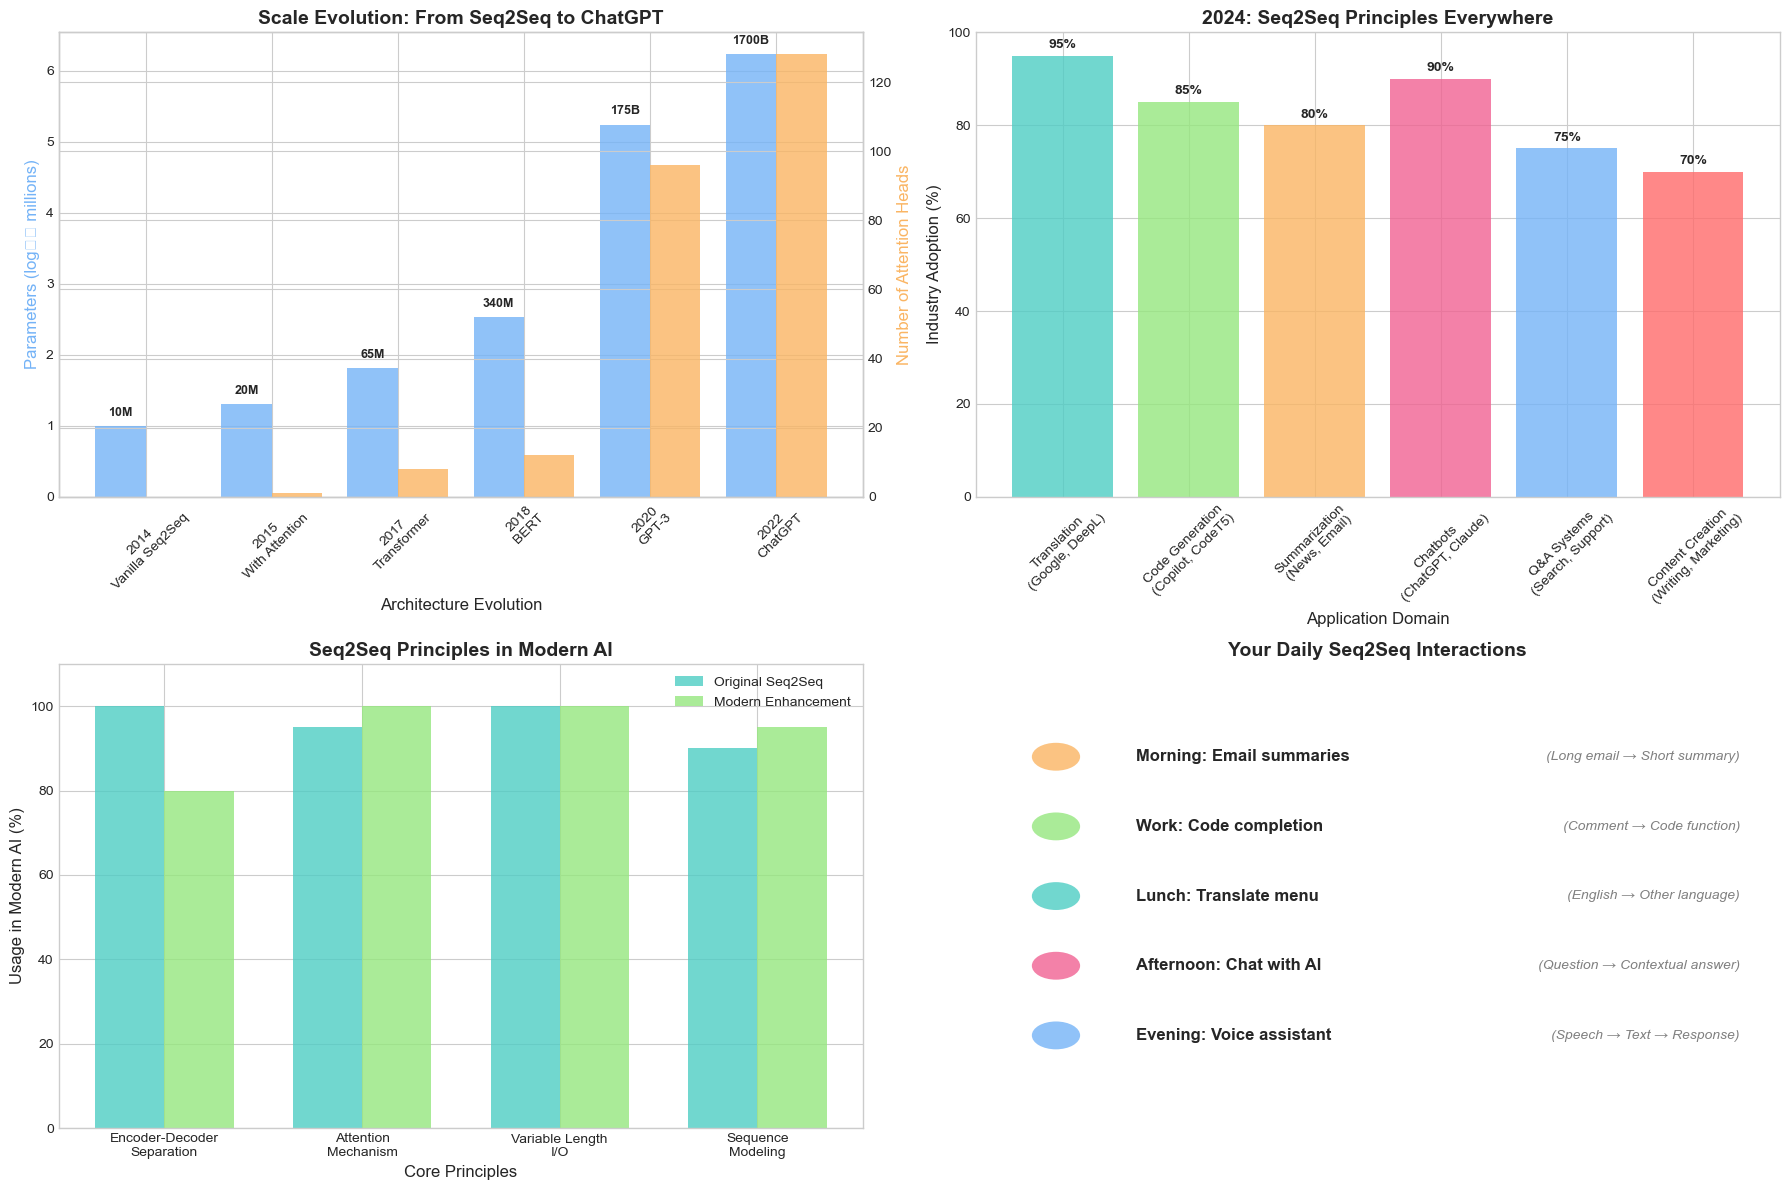

In [11]:
# Modern AI connections and evolution
def create_modern_ai_timeline():
    """Show how seq2seq evolved into modern AI systems."""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
    
    # 1. Architecture evolution
    architectures = {
        '2014\nVanilla Seq2Seq': {'params': 10, 'attention_heads': 0, 'performance': 25},
        '2015\nWith Attention': {'params': 20, 'attention_heads': 1, 'performance': 35},
        '2017\nTransformer': {'params': 65, 'attention_heads': 8, 'performance': 52},
        '2018\nBERT': {'params': 340, 'attention_heads': 12, 'performance': 58},
        '2020\nGPT-3': {'params': 175000, 'attention_heads': 96, 'performance': 65},
        '2022\nChatGPT': {'params': 1700000, 'attention_heads': 128, 'performance': 70},
    }
    
    arch_names = list(architectures.keys())
    params = [architectures[name]['params'] for name in arch_names]
    heads = [architectures[name]['attention_heads'] for name in arch_names]
    performance = [architectures[name]['performance'] for name in arch_names]
    
    # Plot parameter evolution (log scale)
    x = np.arange(len(arch_names))
    
    # Parameters and attention heads
    ax1_twin = ax1.twinx()
    bars1 = ax1.bar(x - 0.2, np.log10(params), 0.4, color=COLOR_ENCODER, alpha=0.8, label='Parameters (log₁₀M)')
    bars2 = ax1_twin.bar(x + 0.2, heads, 0.4, color=COLOR_ATTENTION, alpha=0.8, label='Attention Heads')
    
    ax1.set_xlabel('Architecture Evolution', fontsize=12)
    ax1.set_ylabel('Parameters (log₁₀ millions)', fontsize=12, color=COLOR_ENCODER)
    ax1_twin.set_ylabel('Number of Attention Heads', fontsize=12, color=COLOR_ATTENTION)
    ax1.set_title('Scale Evolution: From Seq2Seq to ChatGPT', fontsize=14, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(arch_names, rotation=45, fontsize=10)
    
    # Add parameter labels
    for i, (bar, param) in enumerate(zip(bars1, params)):
        if param < 1000:
            label = f'{param}M'
        else:
            label = f'{param/1000:.0f}B'
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                label, ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # 2. Modern applications ecosystem
    modern_apps = {
        'Translation\n(Google, DeepL)': 95,
        'Code Generation\n(Copilot, CodeT5)': 85,
        'Summarization\n(News, Email)': 80,
        'Chatbots\n(ChatGPT, Claude)': 90,
        'Q&A Systems\n(Search, Support)': 75,
        'Content Creation\n(Writing, Marketing)': 70
    }
    
    apps = list(modern_apps.keys())
    adoption = list(modern_apps.values())
    colors_apps = [COLOR_CONTEXT, COLOR_PREDICT, COLOR_ATTENTION, 
                   COLOR_DECODER, COLOR_ENCODER, COLOR_CURRENT]
    
    bars = ax2.bar(range(len(apps)), adoption, color=colors_apps, alpha=0.8)
    ax2.set_xlabel('Application Domain', fontsize=12)
    ax2.set_ylabel('Industry Adoption (%)', fontsize=12)
    ax2.set_title('2024: Seq2Seq Principles Everywhere', fontsize=14, fontweight='bold')
    ax2.set_xticks(range(len(apps)))
    ax2.set_xticklabels(apps, rotation=45, fontsize=10)
    ax2.set_ylim(0, 100)
    
    # Add adoption percentages
    for bar, adopt in zip(bars, adoption):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{adopt}%', ha='center', va='bottom', fontweight='bold')
    
    # 3. Core principles that remained
    principles = ['Encoder-Decoder\nSeparation', 'Attention\nMechanism', 
                  'Variable Length\nI/O', 'Sequence\nModeling']
    seq2seq_usage = [100, 95, 100, 90]  # How much modern systems use these
    transformer_enhancement = [80, 100, 100, 95]  # How transformers enhanced them
    
    x_princ = np.arange(len(principles))
    width = 0.35
    
    bars1 = ax3.bar(x_princ - width/2, seq2seq_usage, width, 
                   color=COLOR_CONTEXT, alpha=0.8, label='Original Seq2Seq')
    bars2 = ax3.bar(x_princ + width/2, transformer_enhancement, width,
                   color=COLOR_PREDICT, alpha=0.8, label='Modern Enhancement')
    
    ax3.set_xlabel('Core Principles', fontsize=12)
    ax3.set_ylabel('Usage in Modern AI (%)', fontsize=12)
    ax3.set_title('Seq2Seq Principles in Modern AI', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_princ)
    ax3.set_xticklabels(principles, fontsize=10)
    ax3.legend()
    ax3.set_ylim(0, 110)
    
    # 4. Your daily interactions timeline
    daily_interactions = [
        ('Morning: Email summaries', COLOR_ATTENTION),
        ('Work: Code completion', COLOR_PREDICT),
        ('Lunch: Translate menu', COLOR_CONTEXT),
        ('Afternoon: Chat with AI', COLOR_DECODER),
        ('Evening: Voice assistant', COLOR_ENCODER)
    ]
    
    ax4.axis('off')
    ax4.set_title('Your Daily Seq2Seq Interactions', fontsize=14, fontweight='bold')
    
    for i, (interaction, color) in enumerate(daily_interactions):
        y_pos = 0.8 - i * 0.15
        
        # Draw time indicator
        circle = plt.Circle((0.1, y_pos), 0.03, facecolor=color, alpha=0.8)
        ax4.add_patch(circle)
        
        # Add interaction text
        ax4.text(0.2, y_pos, interaction, ha='left', va='center',
                transform=ax4.transAxes, fontsize=12, fontweight='bold')
        
        # Add seq2seq principle
        principles_daily = [
            '(Long email → Short summary)',
            '(Comment → Code function)', 
            '(English → Other language)',
            '(Question → Contextual answer)',
            '(Speech → Text → Response)'
        ]
        
        ax4.text(0.95, y_pos, principles_daily[i], ha='right', va='center',
                transform=ax4.transAxes, fontsize=10, style='italic', color='gray')
    
    plt.tight_layout()
    plt.show()

create_modern_ai_timeline()

create_modern_context_box(
    "🌍 Global Impact: The seq2seq principles you learned today power: "
    "• 1+ billion daily translations (Google) "
    "• 1+ million developers (GitHub Copilot) "
    "• 100+ million ChatGPT users "
    "• Billions of email summaries "
    "You now understand the foundation of modern AI!",
    COLOR_CURRENT
)

## Part 9: Summary and Key Takeaways

Let's consolidate everything you've learned about sequence-to-sequence models.

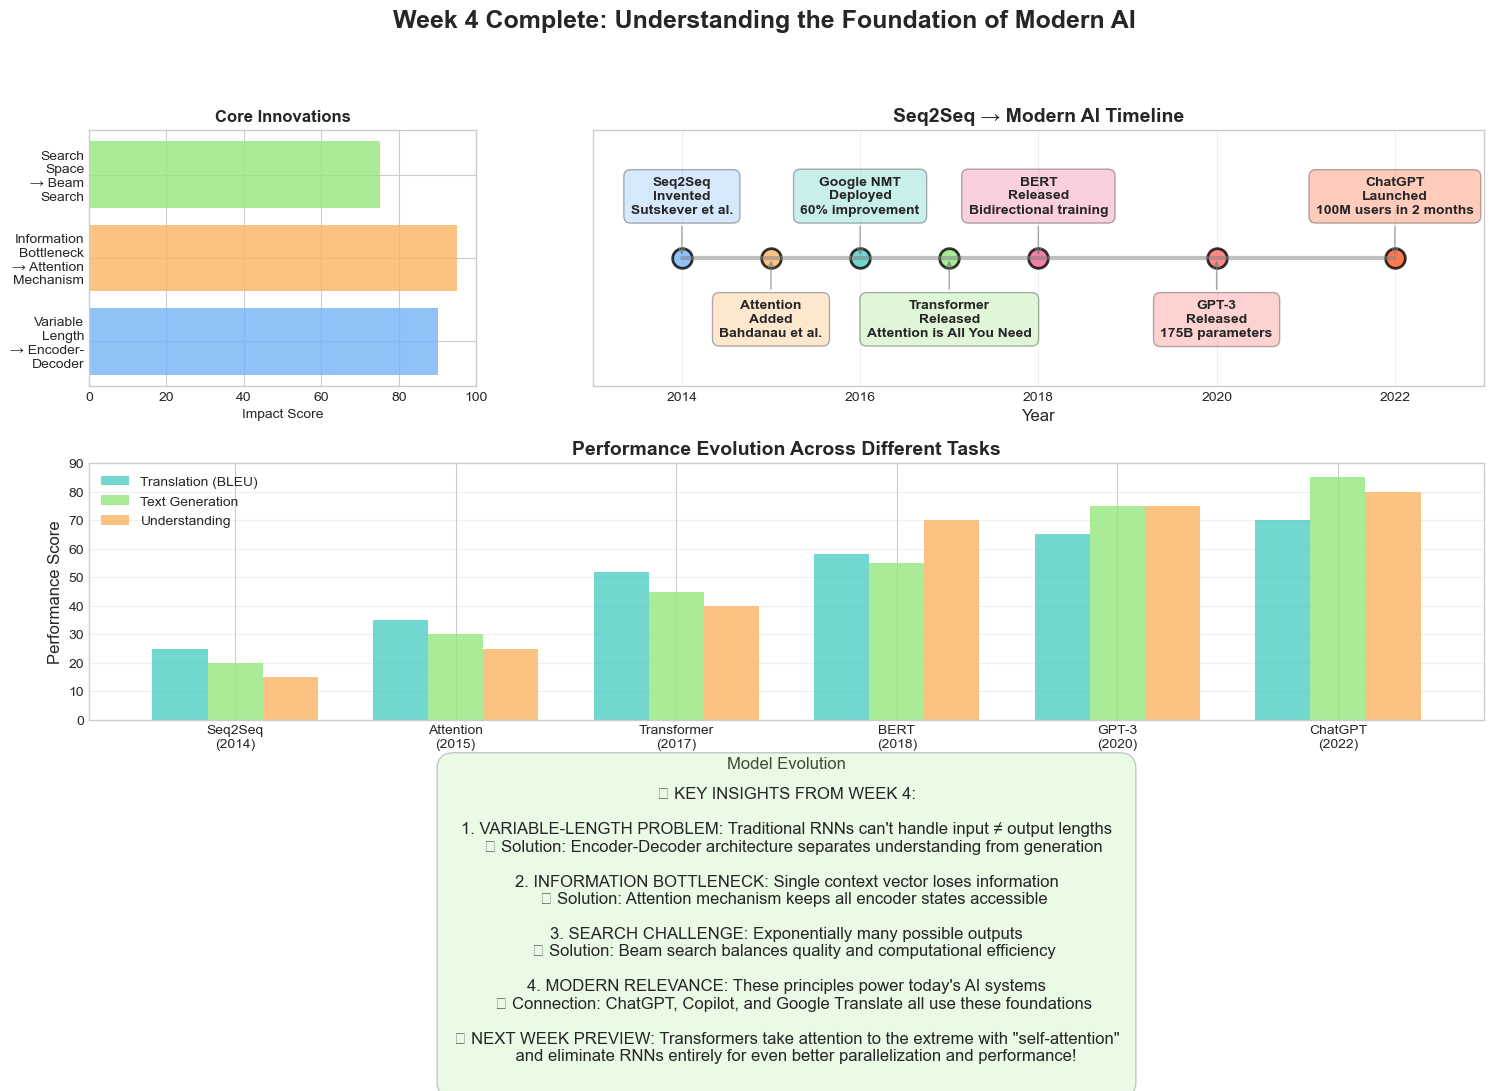


🎓 CONGRATULATIONS! You've mastered sequence-to-sequence models!

📋 Self-Check - Can you now:
  ✅ Explain why variable-length I/O was a breakthrough?
  ✅ Describe the encoder-decoder architecture?
  ✅ Identify the information bottleneck problem?
  ✅ Implement attention mechanism from scratch?
  ✅ Use beam search for sequence generation?
  ✅ Connect these concepts to ChatGPT and modern AI?

🚀 Ready for Next Week:
  📖 Transformers: 'Attention Is All You Need'
  🔧 Self-attention and multi-head attention
  ⚡ Parallel processing (no more sequential RNNs!)
  🌟 Foundation of GPT, BERT, and all modern LLMs



🎉 Lab Complete! Great work mastering these foundational concepts!


In [12]:
# Create comprehensive summary visualization
def create_comprehensive_summary():
    """Final summary with all key concepts integrated."""
    
    fig = plt.figure(figsize=(18, 12))
    
    # Create a grid layout for different summary aspects
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
    
    # 1. Problem → Solution mapping
    ax1 = fig.add_subplot(gs[0, 0])
    problems = ['Variable\nLength', 'Information\nBottleneck', 'Search\nSpace']
    solutions = ['Encoder-\nDecoder', 'Attention\nMechanism', 'Beam\nSearch']
    impact = [90, 95, 75]  # Impact scores
    
    bars = ax1.barh(range(len(problems)), impact, 
                   color=[COLOR_ENCODER, COLOR_ATTENTION, COLOR_PREDICT], alpha=0.8)
    ax1.set_yticks(range(len(problems)))
    ax1.set_yticklabels([f'{p}\n→ {s}' for p, s in zip(problems, solutions)])
    ax1.set_xlabel('Impact Score')
    ax1.set_title('Core Innovations', fontweight='bold')
    ax1.set_xlim(0, 100)
    
    # 2. Timeline of breakthroughs
    ax2 = fig.add_subplot(gs[0, 1:])
    timeline_events = [
        (2014, 'Seq2Seq\nInvented', COLOR_ENCODER, 'Sutskever et al.'),
        (2015, 'Attention\nAdded', COLOR_ATTENTION, 'Bahdanau et al.'),
        (2016, 'Google NMT\nDeployed', COLOR_CONTEXT, '60% improvement'),
        (2017, 'Transformer\nReleased', COLOR_PREDICT, 'Attention is All You Need'),
        (2018, 'BERT\nReleased', COLOR_DECODER, 'Bidirectional training'),
        (2020, 'GPT-3\nReleased', COLOR_CURRENT, '175B parameters'),
        (2022, 'ChatGPT\nLaunched', COLOR_BOTTLENECK, '100M users in 2 months'),
    ]
    
    years = [event[0] for event in timeline_events]
    events = [event[1] for event in timeline_events]
    colors_timeline = [event[2] for event in timeline_events]
    descriptions = [event[3] for event in timeline_events]
    
    # Plot timeline
    for i, (year, event, color, desc) in enumerate(timeline_events):
        ax2.scatter(year, 1, s=200, color=color, alpha=0.8, edgecolors='black', linewidth=2)
        
        # Alternate high and low labels
        y_text = 1.3 if i % 2 == 0 else 0.7
        
        ax2.annotate(f'{event}\n{desc}', (year, 1),
                    xytext=(0, 30 if i % 2 == 0 else -30), 
                    textcoords='offset points',
                    ha='center', va='bottom' if i % 2 == 0 else 'top',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.5', facecolor=color, alpha=0.3),
                    arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7))
    
    # Connect timeline with line
    ax2.plot(years, [1]*len(years), '-', color='gray', alpha=0.5, linewidth=3)
    
    ax2.set_xlim(2013, 2023)
    ax2.set_ylim(0.5, 1.5)
    ax2.set_xlabel('Year', fontsize=12)
    ax2.set_title('Seq2Seq → Modern AI Timeline', fontsize=14, fontweight='bold')
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.set_yticks([])
    
    # 3. Performance comparison
    ax3 = fig.add_subplot(gs[1, :])
    
    models = ['Seq2Seq\n(2014)', 'Attention\n(2015)', 'Transformer\n(2017)', 
              'BERT\n(2018)', 'GPT-3\n(2020)', 'ChatGPT\n(2022)']
    
    metrics = {
        'Translation (BLEU)': [25, 35, 52, 58, 65, 70],
        'Text Generation': [20, 30, 45, 55, 75, 85],
        'Understanding': [15, 25, 40, 70, 75, 80]
    }
    
    x_models = np.arange(len(models))
    width = 0.25
    
    colors_metrics = [COLOR_CONTEXT, COLOR_PREDICT, COLOR_ATTENTION]
    
    for i, (metric, scores) in enumerate(metrics.items()):
        bars = ax3.bar(x_models + i*width, scores, width, 
                      color=colors_metrics[i], alpha=0.8, label=metric)
    
    ax3.set_xlabel('Model Evolution', fontsize=12)
    ax3.set_ylabel('Performance Score', fontsize=12)
    ax3.set_title('Performance Evolution Across Different Tasks', fontsize=14, fontweight='bold')
    ax3.set_xticks(x_models + width)
    ax3.set_xticklabels(models, fontsize=10)
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_ylim(0, 90)
    
    # 4. Key insights summary
    ax4 = fig.add_subplot(gs[2, :])
    ax4.axis('off')
    
    insights_text = """
🎯 KEY INSIGHTS FROM WEEK 4:

1. VARIABLE-LENGTH PROBLEM: Traditional RNNs can't handle input ≠ output lengths
   💡 Solution: Encoder-Decoder architecture separates understanding from generation

2. INFORMATION BOTTLENECK: Single context vector loses information
   💡 Solution: Attention mechanism keeps all encoder states accessible

3. SEARCH CHALLENGE: Exponentially many possible outputs
   💡 Solution: Beam search balances quality and computational efficiency

4. MODERN RELEVANCE: These principles power today's AI systems
   💡 Connection: ChatGPT, Copilot, and Google Translate all use these foundations

🚀 NEXT WEEK PREVIEW: Transformers take attention to the extreme with "self-attention"
    and eliminate RNNs entirely for even better parallelization and performance!
    """
    
    ax4.text(0.5, 0.5, insights_text, ha='center', va='center',
            transform=ax4.transAxes, fontsize=12,
            bbox=dict(boxstyle='round,pad=1', facecolor=COLOR_PREDICT, alpha=0.2))
    
    plt.suptitle('Week 4 Complete: Understanding the Foundation of Modern AI', 
                fontsize=18, fontweight='bold', y=0.98)
    
    plt.show()

create_comprehensive_summary()

# Final interactive element
print("\n" + "="*70)
print("🎓 CONGRATULATIONS! You've mastered sequence-to-sequence models!")
print("="*70)
print("\n📋 Self-Check - Can you now:")
print("  ✅ Explain why variable-length I/O was a breakthrough?")
print("  ✅ Describe the encoder-decoder architecture?")
print("  ✅ Identify the information bottleneck problem?")
print("  ✅ Implement attention mechanism from scratch?")
print("  ✅ Use beam search for sequence generation?")
print("  ✅ Connect these concepts to ChatGPT and modern AI?")

print("\n🚀 Ready for Next Week:")
print("  📖 Transformers: 'Attention Is All You Need'")
print("  🔧 Self-attention and multi-head attention")
print("  ⚡ Parallel processing (no more sequential RNNs!)")
print("  🌟 Foundation of GPT, BERT, and all modern LLMs")

create_modern_context_box(
    "🏅 Achievement Unlocked: You now understand the core technology behind "
    "billion-dollar AI systems! The encoder-decoder + attention principles "
    "you learned are used by Google, OpenAI, Microsoft, and every major AI company.",
    COLOR_CURRENT
)

print("\n🎉 Lab Complete! Great work mastering these foundational concepts!")